# ネットワークの探索

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import functools
import operator

## 経路探索

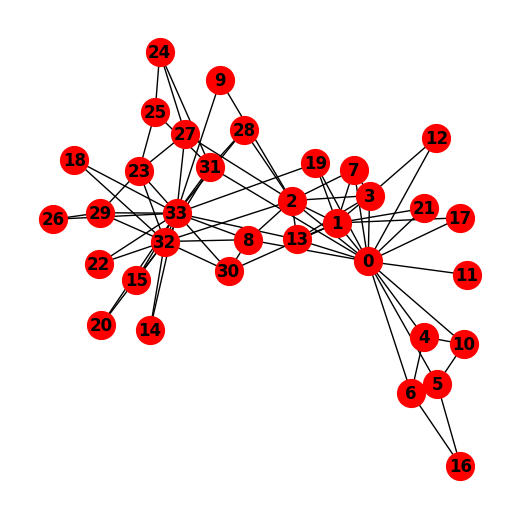

In [2]:
G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight="bold")

### 幅優先探索
- nx.bfs_edges(<グラフ>, source=<探索開始点>, depth_limit=<深さの上限>) → <深さの上限まで探索した頂点のタプル>

In [3]:
# <深さの上限まで探索した頂点のタプル> = nx.bfs_edges(<グラフ>, source=<探索開始点>, depth_limit=<深さの上限>)
print("BFS：", list(nx.bfs_edges(G, source=0)))

BFS： [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]


In [4]:
d1 = list(nx.bfs_edges(G, source=0, depth_limit=1))
d2 = list(nx.bfs_edges(G, source=0, depth_limit=2))
d3 = list(nx.bfs_edges(G, source=0, depth_limit=3))
d4 = list(nx.bfs_edges(G, source=0, depth_limit=4))
d5 = list(nx.bfs_edges(G, source=0, depth_limit=5))

# 結果
print("depth1", list(d1))
print("depth2", list(d2))
print("depth3", list(d3))
print("depth4", list(d4))
print("-" * 100)

# 差分の結果
print("depth1", d1)
print("depth2", list(set(d2)-set(d1)))
print("depth3", list(set(d3)-set(d2)))
print("depth4", list(set(d4)-set(d3)))

depth1 [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)]
depth2 [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25)]
depth3 [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]
depth4 [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]
------------------

### 深さ優先探索
- 

In [5]:
print("深さ優先探索", list(nx.dfs_preorder_nodes(G, source=0)))

深さ優先探索 [0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]


## ダイクストラ法
- ダイクストラ法による最短パス：nx.dijkstra_path(G, <スタートの頂点>, <終わりの頂点>)
- ダイクストラ法による最短パス長：nx.dijkstra_path_length(G, start, <終わりの頂点>)

[0, 2, 5]
11


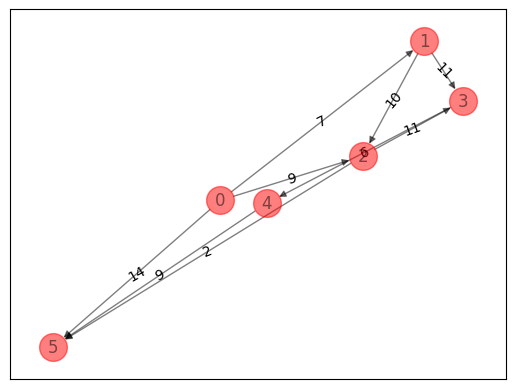

In [6]:
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), (0, 5, 14), (1, 2, 10), (1, 3, 11), (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

start = 0
end = 5

shortest_path = nx.dijkstra_path(G, start, end)
shortest_path_weight = nx.dijkstra_path_length(G, start, end)

print(shortest_path)
print(shortest_path_weight)

pos = nx.spring_layout(G, k=0.7)
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx(G, pos, node_size=400, node_color="red", with_labels=True, alpha=0.5)